# CF969-7-SP-CO Big Data for Financial Computation

# Assignment Part IIB

### Importing Essential Libraries 
Below we have imported all the libraries we are gonna use in our solution

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Loading our DataSet 
To start, we will first read the dataset provided by our module supervisor on moodle. To read the csv file, you can use the "pandas" library in Python. 

In [52]:
# Load the dataset
df = pd.read_csv('MLF_GP1_CreditScore.csv')


### Pre-processing steps applied on the Dataset 
In this section, we will be preparing the data and performing analysis on it. After that, we can preprocess the data by performing feature scaling on the data and encoding the categorical variables using LabelEncoder. Both of these steps can be performed in order. In this stage, we are going to get our dataset ready so that we can apply our Machine Learning models to it successfully in the next step.
indicate that the 'Rating' column will serve as the category column. After that, we put the category values via a label encoder so that they can be converted into numerical numbers.

In [53]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:', cat_col)

def convert_categorical_to_numerical(data, col):
    LE = LabelEncoder()

    # encoding the categorical columns in the DataFrame using LabelEncoder
    for col in cat_col:
        if data[col].dtype == 'object':
            data[col] = LE.fit_transform(df[col])

    return data

cat_free_data = convert_categorical_to_numerical(df, cat_col)


Categorical columns: ['Rating']


Here we are removing the column labelled 'InvGrd' from the DataFrame df. When a target variable or output variable is separated from the input or feature variables, and we wish to separate them out prior to the construction of a model, this is the procedure that is followed. where "X" is the set of independent variables and "y" is the target variable.

In [54]:
# Define the input and target variables
X = df.drop(['InvGrd'], axis=1)
y = df['InvGrd']
print(X.head(4))

   Sales/Revenues  Gross Margin    EBITDA  EBITDA Margin  \
0       -0.005496      0.030763  0.018885       0.024515   
1       -0.005496      0.030763  0.088716       0.094733   
2       -0.007045      0.023159  0.088716       0.096440   
3       -0.009396      0.028400  0.088716       0.099046   

   Net Income Before Extras  Total Debt  Net Debt   LT Debt   ST Debt  \
0                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
1                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
2                  0.108590    0.039410  0.034268  0.009059  0.250371   
3                  0.146137    0.030071  0.036938 -0.016964  0.356994   

       Cash  ...       CFO  Interest Coverage  Total Liquidity  \
0 -0.133716  ...  0.068526           0.136748         0.392143   
1 -0.133716  ...  0.068526           0.214657         0.392143   
2  0.101315  ...  0.068136           0.205290         0.483257   
3 -0.052606  ...  0.073784           0.232991         0.996955   

  

### Splitting of the dataset between training set and a test set in a 80%:20% ratio.
The dataset is going to be partitioned into a training set and a testing set. The testing data will be used to evaluate how well the model performs on data that it has never seen, whereas the training data will be utilised for training purposes. The distribution of the data will be 80:20, which means that 80% of it will go into the training set, and 20% of it will go into the testing set. The train_test_split() method found in scikit-learn can be utilised to accomplish this goal.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying Machine Learning Models:
We are able to employ machine learning methodologies in order to handle the challenge of classifying a company's credit rating and making a prediction as to whether or not the company is regarded as investment grade. The following are some of the ways in which we can put the strategies outlined into action:
After data slicing we then fit and evaluate three different models:

###### 1) Linear regression with Ridge and Lasso regularization
###### 2) Logistic regression with Ridge and Lasso regularization
###### 3) Neural Networks based approach

We will be focusing on the three Machine Learning Model approaches and after training the models on the training set and evaluating them on the test set, the classification report and confusion matrix are generated for each approach. The classification report summarises the performance of the model in terms of precision, recall, and F1 score, whereas the confusion matrix displays the total amount of true positives, false positives, true negatives, and false negatives.

## 1) Linear regression approach with Ridge (L1) and Lasso (L2) regularization:

In [56]:
print("---------------------------------------------------------------")
print("-----------------Linear Regression Ridge(L1)-------------------")
print("---------------------------------------------------------------")
# Linear Regression with Ridge Regularization
reg_ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=True)
reg_ridge.fit(X_train, y_train)
ridge_prd = reg_ridge.predict(X_test)
ridge_prd_binary = [1 if pred >= 0.5 else 0 for pred in ridge_prd]
ridge_acc = accuracy_score(y_test, ridge_prd_binary)
print("Ridge Regularization Accuracy: %.2f%%" % ((ridge_acc)*100))
print("---------------------------------------------------------------")
reg_ridge = RidgeClassifier(alpha=0.5, solver='auto', random_state=42)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred)) 
print("---------------------------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# print("")
# print("")
# print("Classification Report:")
# print(classification_report(y_test, ridge_prd_binary)) 
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, ridge_prd_binary))


print("---------------------------------------------------------------")
print("---------------------------------------------------------------")
print("----------------Linear Regression Lasso(L2)--------------------")
print("---------------------------------------------------------------")
# Linear Regression with Lasso Regularization
reg_lasso = Lasso(alpha=1.0, fit_intercept=True, normalize=True)
reg_lasso.fit(X_train, y_train)
lasso_pred = reg_lasso.predict(X_test)
lasso_pred_binary = [1 if pred >= 0.5 else 0 for pred in lasso_pred]
lasso_acc = accuracy_score(y_test, lasso_pred_binary)
print("Lasso Regularization Accuracy: %.2f%%" % ((lasso_acc)*100))
print("---------------------------------------------------------------")
reg_lasso = LassoCV(cv=5, random_state=42)
reg_lasso.fit(X_train, y_train)
y_pred = reg_lasso.predict(X_test).round()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


---------------------------------------------------------------
-----------------Linear Regression Ridge(L1)-------------------
---------------------------------------------------------------
Ridge Regularization Accuracy: 75.29%
---------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.07      0.13        84
           1       0.77      1.00      0.87       256

    accuracy                           0.77       340
   macro avg       0.81      0.53      0.50       340
weighted avg       0.79      0.77      0.68       340

---------------------------------------------------------------
Confusion Matrix:
[[  6  78]
 [  1 255]]
---------------------------------------------------------------
---------------------------------------------------------------
----------------Linear Regression Lasso(L2)--------------------
-----------------------------------------------------------

We are able to make an accurate prediction regarding a company's investment grade status by utilising logistic regression. Regularization techniques like Ridge and Lasso can be utilised to cut down on overfitting. The amount of regularisation that is applied can be adjusted through the use of its alpha parameter. The above results shows that both L1, L2 Linear regression techniques Ridge and Lasso are giving equal accuracy of about 75.29% on our provided dataset. 
Overall, Ridge shows higher Recall, F1-score values as compared to Lasso. Whereas, Lasso surpassed Ridge in terms of Precision values.

## 2) Logistic regression approach with Ridge (L1) and Lasso (L2) regularization:

In [57]:
print("---------------------------------------------------------------")
print("---------------Logistic Regression Ridge(L1)-------------------")
print("---------------------------------------------------------------")

# Logistic Regression with Ridge Regularization
log_ridge = LogisticRegression(penalty='l2', solver='lbfgs')
log_ridge.fit(X_train, y_train)
ridge_log_pred = log_ridge.predict(X_test)
ridge_log_acc = accuracy_score(y_test, ridge_log_pred)
print("Logistic Regression with Ridge Regularization Accuracy:%.2f%%" % ((ridge_log_acc)*100))
print("---------------------------------------------------------------")
log_ridge = LogisticRegression(penalty='l2', C=1, solver='lbfgs', random_state=42)
log_ridge.fit(X_train, y_train)
y_pred = log_ridge.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("---------------------------------------------------------------")
print("---------------------------------------------------------------")
print("---------------Logistic Regression Lasso(L2)-------------------")
print("---------------------------------------------------------------")
# Logistic Regression with Lasso Regularization
log_lasso = LogisticRegression(penalty='l1', solver='saga') #'liblinear'
log_lasso.fit(X_train, y_train)
lasso_log_pred = log_lasso.predict(X_test)
lasso_log_acc = accuracy_score(y_test, lasso_log_pred)
print("Logistic Regression with Lasso Regularization Accuracy:%.2f%%" % ((lasso_log_acc)*100))
print("---------------------------------------------------------------")
log_lasso = LogisticRegression(penalty='l1', C=1, solver='saga', random_state=42)
log_lasso.fit(X_train, y_train)
y_pred = log_lasso.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------------------------------")


---------------------------------------------------------------
---------------Logistic Regression Ridge(L1)-------------------
---------------------------------------------------------------
Logistic Regression with Ridge Regularization Accuracy:76.47%
---------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.07      0.13        84
           1       0.77      0.99      0.86       256

    accuracy                           0.76       340
   macro avg       0.76      0.53      0.50       340
weighted avg       0.76      0.76      0.68       340

Confusion Matrix:
[[  6  78]
 [  2 254]]
---------------------------------------------------------------
---------------------------------------------------------------
---------------Logistic Regression Lasso(L2)-------------------
---------------------------------------------------------------
Logistic Regression with Lasso Regu

Similar to the previous method, we can predict whether a company has an investment grade using logistic regression. Additionally, Ridge and Lasso regularisation can be utilised to reduce overfitting. The above output shows that Logistic Regression Ridge is much more promising as compared to Logistic Lasso or any Linear regression method with having accuracy of 76.47% which higher then all above mentioned techniques. Its Precision, Recall, F1-score also overshadow others.

## 3) Neural Networks based approach

In [58]:
print("---------------------------------------------------------------")
print("----------------Neural Network Classifier----------------------")
print("---------------------------------------------------------------")
# Neural Network Classifier
clasf = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=1000, random_state=42)
clasf.fit(X_train, y_train)
nn_prd = clasf.predict(X_test)
nn_acc = accuracy_score(y_test, nn_prd)
print("Neural Network Accuracy: %.2f%%" % ((nn_acc)*100))
print("---------------------------------------------------------------")
mlp_clasf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=0.0001,
                    solver='adam', activation='relu', random_state=42)
mlp_clasf.fit(X_train, y_train)
y_pred = mlp_clasf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------------------------------")

---------------------------------------------------------------
----------------Neural Network Classifier----------------------
---------------------------------------------------------------
Neural Network Accuracy: 91.18%
---------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        84
           1       0.92      0.98      0.95       256

    accuracy                           0.92       340
   macro avg       0.93      0.86      0.89       340
weighted avg       0.92      0.92      0.92       340

Confusion Matrix:
[[ 62  22]
 [  4 252]]
---------------------------------------------------------------


Using MLPClassifier from the sklearn library, this code implements a Neural Network classifier. It then initialises the classifier with two hidden layers containing 16 and 8 nodes, the 'relu' activation function, the 'adam' solver, and a maximum of one thousand iterations. It then applies the classifier to the training set (X_train and y_train), predicts the labels for the test set.
Finally, the classification report and confusion matrix for the predicted labels are printed using the classification_report() and confusion_matrix() functions from the sklearn.metrics package.
By comparing the performance of each model and choosing the optimal model based on the evaluation metrics and domain expertise, it is evident that Neural Network is the best among them with outshining in all metrics of classification with having 91.18% of Accuracy and higher values of Precision, recall, F1-score all together with comparision of previous model approaches.

## Cumulative Comparison of Classifiers

Comparison of each method's accuracy, precision, recall, and F1 score, as well as confusion matrices on the test set, can be used to evaluate the efficiency of the methods and determine whether or not they are suitable for solving this problem. In addition, we are able to compare the interpretability of the results and visualise them with the accuracy of the classifiers serving as the important component in order to conduct a cumulative comparison between them.

<BarContainer object of 5 artists>

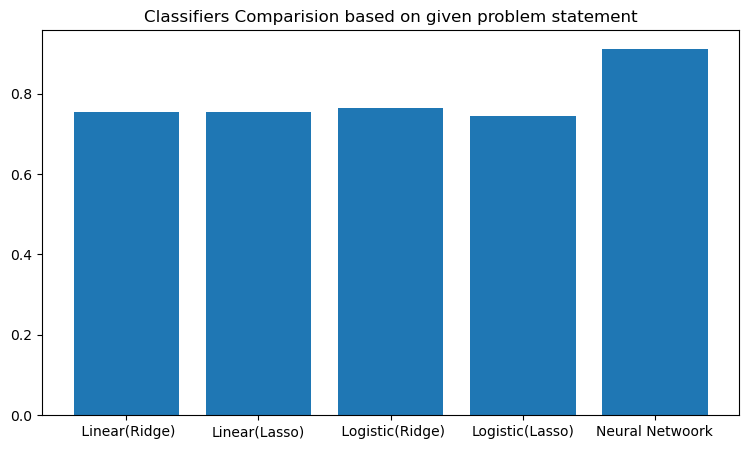

In [59]:
plt.figure(figsize=(9, 5))
plt.title('Classifiers Comparision based on given problem statement')
models = [' Linear(Ridge)', 'Linear(Lasso)', ' Logistic(Ridge)', 'Logistic(Lasso)', 'Neural Netwoork']
res =[ridge_acc, lasso_acc, ridge_log_acc, lasso_log_acc, nn_acc]
plt.bar(models, res)

## Conclusion

After the execution of and comparison of three distinct machine learning models for the task of predicting whether or not a company is in an investment grade, it is possible to draw the conclusion that the approach based on Neural Networks outperformed the other two models, which were a linear regression with Ridge and Lasso, and a logistic regression with Ridge and Lasso.

The Neural Network model obtained the greatest possible accuracy score of 91.18% and offered a superior classification report as well as a confusion matrix. This suggests that, when compared to the other two models, the Neural Network model is preferable in terms of its ability to perform the classification task of forecasting investment-grade firms.